In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df = pd.read_csv('datasets/final_train.csv')

In [4]:
df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
X = df.drop(["HasDetections"], axis = 1)
y = df["HasDetections"]

In [6]:
def print_results(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    print("Auc ROC: ", auc_score)
    return {
        "accuracy": accuracy,
        "precision": accuracy,
        "recall": recall,
        "f1": f1,
        "auc_score": auc_score,
    }

In [7]:
def plot_roc_curve(clf, X_test, y_test):
    #define metrics
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)

# Random Forest

In [9]:
rf_clf = RandomForestClassifier(n_estimators = 70, random_state = 122)

In [10]:
X_train

,IsBeta,IsSxsPassiveMode,AVProductsInstalled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,...,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK
69523,0,0,2.0,1,220,68380.0,237.0,72,16299,768,...,0,0,0,1,0,0,1,0,0,0
114878,0,0,1.0,1,160,85244.0,204.0,170,17134,768,...,1,0,0,0,0,0,1,0,0,0
133729,0,1,3.0,1,107,21124.0,138.0,134,17134,256,...,1,0,0,0,0,0,1,0,0,0
117003,0,0,1.0,0,66,119877.0,89.0,88,7601,768,...,1,0,0,0,0,0,1,0,0,0
16843,0,0,1.0,1,29,56427.0,35.0,171,17134,768,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81492,0,0,2.0,1,89,142110.0,120.0,118,16299,768,...,0,0,0,1,1,0,0,0,0,0
20971,0,0,2.0,1,88,2808.0,276.0,74,16299,768,...,0,1,0,0,0,0,1,0,0,0
120166,0,0,1.0,1,9,20805.0,10.0,214,17134,256,...,1,0,0,0,1,0,0,0,0,0
24932,0,0,1.0,1,21,153669.0,39.0,34,17134,256,...,0,1,0,0,0,0,1,0,0,0


In [11]:
clf = rf_clf.fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
random_forest_results = print_results(y_test, y_pred)

Accuracy:  0.5932329029172645
Precision:  0.5943207832058838
Recall:  0.5842750430951925
F1:  0.5892551008088857
Auc ROC:  0.5932217783301716


### K Cross Validation

In [14]:
random_forest_scores = cross_val_score(clf, X, y, cv=10)

In [15]:
random_forest_scores

array([0.59368723, 0.5972023 , 0.59533716, 0.60200861, 0.58816356,
       0.60086083, 0.59956958, 0.59756098, 0.58956884, 0.60599756])

### ROC Curve

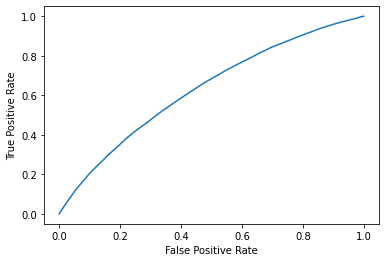

In [16]:
plot_roc_curve(clf, X_test, y_test)

# Logistic Regression

In [17]:
logistic = LogisticRegression(random_state = 12)

In [18]:
l_clf = logistic.fit(X_train, y_train)

In [19]:
y_pred_log = l_clf.predict(X_test)

In [20]:
logistic_results = print_results(y_test, y_pred_log)

Accuracy:  0.4993782879005261
Precision:  0.4993782879005261
Recall:  1.0
F1:  0.666113804541975
Auc ROC:  0.5


### K Cross Validation

In [21]:
logistic_scores = cross_val_score(l_clf, X, y, cv=10)

In [22]:
logistic_scores

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.49996413, 0.50003587])

### ROC CURVE

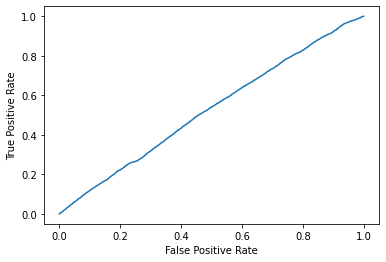

In [23]:
plot_roc_curve(l_clf, X_test, y_test)